In [ ]:
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time
import joblib

________________________________________________________________________________
From Kurup and the model, based on the following variables:

'Depth (m)', "σ',v (kPa)", 'SBT (-)', 'SBTn (-)' & 'Mod. SBTn (-)'

________________________________________________________________________________

________________________________________________________________________________
Load Model
________________________________________________________________________________

In [ ]:
#Load model_06
model = joblib.load(r'/content/drive/MyDrive/Colab Notebooks/CPT_RF_02_88_06_compress.sav')

________________________________________________________________________________
Predictions for YL_C2
________________________________________________________________________________

In [ ]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_YL_C2.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Unnamed: 0'], axis = 1)
df_cpt = df_cpt.drop([1, 8, 9, 10], axis = 0)

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
df_cpt

array([[  1.2       ,  19.        ,   4.        ,   5.12835766,
          6.15900095,   1.53      ,  61.353     ],
       [  4.2       ,  47.        ,   4.        ,   6.07020417,
          6.9935136 ,   1.218     ,  46.4058    ],
       [  5.8       ,  61.        ,   4.        ,   4.16669717,
          5.01209311,   1.711     ,  40.8929    ],
       [  7.2       ,  73.        ,   4.        ,   4.24734479,
          4.68583417,   1.201     ,  41.6747    ],
       [  8.8       ,  87.        ,   3.        ,   3.00466707,
          2.06696847,   0.939     ,  23.0055    ],
       [ 10.2       ,  99.        ,   3.        ,   2.9895    ,
          2.15935714,   1.009     ,  20.18      ],
       [ 11.8       , 113.        ,   3.        ,   2.75052476,
          1.99878772,   0.681     ,   6.4014    ]])

In [ ]:
'''
Inputs
'''
X = df_cpt[:, [0, 1, 2, 3, 4]]

#1 --> 'Depth (m)' --> index: 0
#2 --> "σ',v (kPa)" --> index: 1
#3 --> 'SBT (-)' --> index: 2
#4 --> 'SBTn (-)' --> index: 3
#5 --> 'Mod. SBTn (-)' --> index: 4

'''
Outputs
'''
y = df_cpt[:, [5, 6]] 

#1 --> 'qc (MPa)' --> index: 5
#2 --> 'fs (kPa)' --> index: 6

In [ ]:
#Making a prediction
y_pred_YL_C2 = model.predict(X)

In [ ]:
y_pred_YL_C2

array([[ 0.98195497,  8.22973947],
       [ 2.07313064, 35.15167855],
       [ 1.92171316, 50.70066677],
       [ 2.26007663, 60.91085227],
       [ 0.72551867, 17.75615593],
       [ 0.8757217 , 36.53158208],
       [ 0.66490752, 18.25879625]])

In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y, y_pred_YL_C2)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y, y_pred_YL_C2)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y, y_pred_YL_C2)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc_YL_C2 = mean_absolute_error(y[:, 0], y_pred_YL_C2[:, 0])
print('The mae is: %.4f MPa' %mae_qc_YL_C2)
mse_qc_YL_C2 = mean_squared_error(y[:, 0], y_pred_YL_C2[:, 0])
print('The mse is: %.4f MPa' %mse_qc_YL_C2)
rmse_qc_YL_C2 = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc_YL_C2)
r2_qc_YL_C2 = r2_score(y[:, 0], y_pred_YL_C2[:, 0])
print('The R2 is: %.4f MPa' %r2_qc_YL_C2)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs_YL_C2 = mean_absolute_error(y[:, 1], y_pred_YL_C2[:, 1])
print('The mae is: %.4f kPa' %mae_fs_YL_C2)
mse_fs_YL_C2 = mean_squared_error(y[:, 1], y_pred_YL_C2[:, 1])
print('The mse is: %.4f kPa' %mse_fs_YL_C2)
rmse_fs_YL_C2 = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs_YL_C2)
r2_fs_YL_C2 = r2_score(y[:, 1], y_pred_YL_C2[:, 1])
print('The R2 is: %.4f MPa' %r2_fs_YL_C2)

Metrics Global
The mae is: 9.2797
The mse is: 275.1962
The rmse is: 16.5890
The R2 is: -1.4475
____________________________________________
Metrics for qc
The mae is: 0.4337 MPa
The mse is: 0.3230 MPa
The rmse is: 16.5890 MPa
The R2 is: -2.0452 MPa
____________________________________________
Metrics for fs
The mae is: 18.1257 kPa
The mse is: 550.0694 kPa
The rmse is: 16.5890 kPa
The R2 is: -0.8498 MPa


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


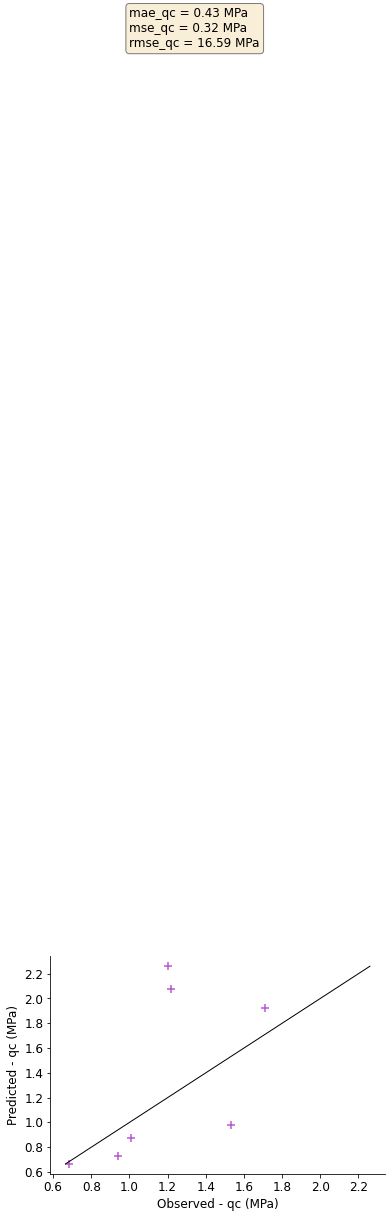

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_qc = %.2f MPa' % (mae_qc_YL_C2, ),r'mse_qc = %.2f MPa' % (mse_qc_YL_C2, ), r'rmse_qc = %.2f MPa' % (rmse_qc_YL_C2, )))

p1 = max(max(y_pred_YL_C2[:, 0]), max(y[:, 0]))
p2 = min(min(y_pred_YL_C2[:, 0]), min(y[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y[:, 0], y_pred_YL_C2[:, 0], s = 50, c = 'mediumorchid', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(1, 10,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_qc', dpi = 600)

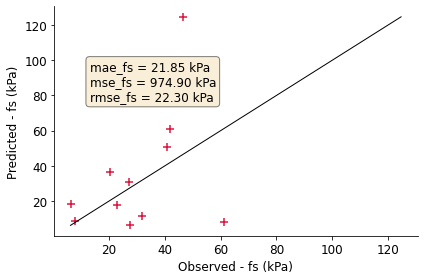

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_fs = %.2f kPa' % (mae_fs_YL_C2, ),r'mse_fs = %.2f kPa' % (mse_fs_YL_C2, ), r'rmse_fs = %.2f kPa' % (rmse_fs_YL_C2, )))

p1 = max(max(y_pred_YL_C2[:, 1]), max(y[:, 1]))
p2 = min(min(y_pred_YL_C2[:, 1]), min(y[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y[:, 1], y_pred_YL_C2[:, 1], s = 50, c = 'crimson', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(13, 100, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_fs_fs', dpi = 600)

________________________________________________________________________________
Predictions for NT_C16
________________________________________________________________________________

In [ ]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_NT_C16.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Unnamed: 0'], axis = 1)

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
'''
Inputs
'''
X_NT_C16 = df_cpt[:, [0, 1, 2, 3, 4]]

#1 --> 'Depth (m)' --> index: 0
#2 --> "σ',v (kPa)" --> index: 1
#3 --> 'SBT (-)' --> index: 2
#4 --> 'SBTn (-)' --> index: 3
#5 --> 'Mod. SBTn (-)' --> index: 4

'''
Outputs
'''
y_NT_C16 = df_cpt[:, [5, 6]] 

#1 --> 'qc (MPa)' --> index: 5
#2 --> 'fs (kPa)' --> index: 6

In [ ]:
#Making a prediction
y_pred_NT_C16 = model.predict(X_NT_C16)

In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_NT_C16, y_pred_NT_C16)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_NT_C16, y_pred_NT_C16)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_pred_NT_C16, y_NT_C16)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc_NT_C16 = mean_absolute_error(y_NT_C16[:, 0], y_pred_NT_C16[:, 0])
print('The mae is: %.4f MPa' %mae_qc_NT_C16)
mse_qc_NT_C16 = mean_squared_error(y_NT_C16[:, 0], y_pred_NT_C16[:, 0])
print('The mse is: %.4f MPa' %mse_qc_NT_C16)
rmse_qc_NT_C16 = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc_NT_C16)
r2_qc_NT_C16 = r2_score(y_NT_C16[:, 0], y_pred_NT_C16[:, 0])
print('The R2 is: %.4f MPa' %r2_qc_NT_C16)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs_NT_C16 = mean_absolute_error(y_NT_C16[:, 1], y_pred_NT_C16[:, 1])
print('The mae is: %.4f kPa' %mae_fs_NT_C16)
mse_fs_NT_C16 = mean_squared_error(y_NT_C16[:, 1], y_pred_NT_C16[:, 1])
print('The mse is: %.4f kPa' %mse_fs_NT_C16)
rmse_fs_NT_C16 = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs_NT_C16)
r2_fs_NT_C16 = r2_score(y_NT_C16[:, 1], y_pred_NT_C16[:, 1])
print('The R2 is: %.4f MPa' %r2_fs_NT_C16)

Metrics Global
The mae is: 15.6608
The mse is: 655.1412
The rmse is: 25.5957
The R2 is: -3.3039
____________________________________________
Metrics for qc
The mae is: 0.6867 MPa
The mse is: 0.6487 MPa
The rmse is: 25.5957 MPa
The R2 is: -2.4489 MPa
____________________________________________
Metrics for fs
The mae is: 30.6349 kPa
The mse is: 1309.6338 kPa
The rmse is: 25.5957 kPa
The R2 is: -1.7039 MPa


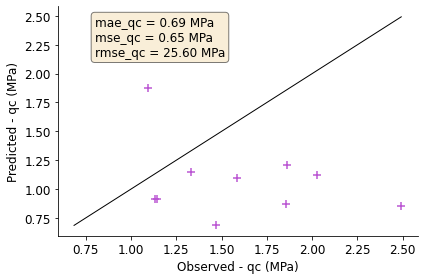

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_qc = %.2f MPa' % (mae_qc_NT_C16, ),r'mse_qc = %.2f MPa' % (mse_qc_NT_C16, ), r'rmse_qc = %.2f MPa' % (rmse_qc_NT_C16, )))

p1 = max(max(y_pred_NT_C16[:, 0]), max(y_NT_C16[:, 0]))
p2 = min(min(y_pred_NT_C16[:, 0]), min(y_NT_C16[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C16[:, 0], y_pred_NT_C16[:, 0], s = 50, c = 'mediumorchid', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(0.8, 2.5,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_qc', dpi = 600)

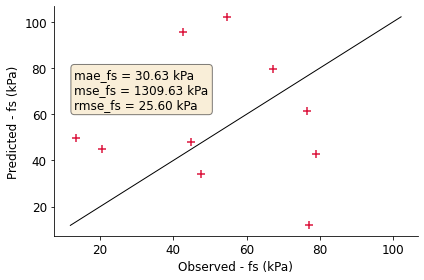

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_fs = %.2f kPa' % (mae_fs_NT_C16, ),r'mse_fs = %.2f kPa' % (mse_fs_NT_C16, ), r'rmse_fs = %.2f kPa' % (rmse_fs_NT_C16, )))

p1 = max(max(y_pred_NT_C16[:, 1]), max(y_NT_C16[:, 1]))
p2 = min(min(y_pred_NT_C16[:, 1]), min(y_NT_C16[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C16[:, 1], y_pred_NT_C16[:, 1], s = 50, c = 'crimson', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(13, 80, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_fs_fs', dpi = 600)

________________________________________________________________________________
Predictions for NT_C7
________________________________________________________________________________

In [ ]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_NT_C7.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Unnamed: 0', 'Unnamed: 8'], axis = 1)
df_cpt = df_cpt.dropna()

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
'''
Inputs
'''
X_NT_C7 = df_cpt[:, [0, 1, 2, 3, 4]]

#1 --> 'Depth (m)' --> index: 0
#2 --> "σ',v (kPa)" --> index: 1
#3 --> 'SBT (-)' --> index: 2
#4 --> 'SBTn (-)' --> index: 3
#5 --> 'Mod. SBTn (-)' --> index: 4

'''
Outputs
'''
y_NT_C7 = df_cpt[:, [5, 6]] 

#1 --> 'qc (MPa)' --> index: 5
#2 --> 'fs (kPa)' --> index: 6

In [ ]:
#Making a prediction
y_pred_NT_C7= model.predict(X_NT_C7) 

In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_NT_C7, y_pred_NT_C7)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_NT_C7, y_pred_NT_C7)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_pred_NT_C7, y_NT_C7)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc_NT_C7 = mean_absolute_error(y_NT_C7[:, 0], y_pred_NT_C7[:, 0])
print('The mae is: %.4f MPa' %mae_qc_NT_C7)
mse_qc_NT_C7 = mean_squared_error(y_NT_C7[:, 0], y_pred_NT_C7[:, 0])
print('The mse is: %.4f MPa' %mse_qc_NT_C7)
rmse_qc_NT_C7 = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc_NT_C7)
r2_qc_NT_C7 = r2_score(y_NT_C7[:, 0], y_pred_NT_C7[:, 0])
print('The R2 is: %.4f MPa' %r2_qc_NT_C7)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs_NT_C7 = mean_absolute_error(y_NT_C7[:, 1], y_pred_NT_C7[:, 1])
print('The mae is: %.4f kPa' %mae_fs_NT_C7)
mse_fs_NT_C7 = mean_squared_error(y_NT_C7[:, 1], y_pred_NT_C7[:, 1])
print('The mse is: %.4f kPa' %mse_fs_NT_C7)
rmse_fs_NT_C7 = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs_NT_C7)
r2_fs_NT_C7 = r2_score(y_NT_C7[:, 1], y_pred_NT_C7[:, 1])
print('The R2 is: %.4f MPa' %r2_fs_NT_C7)

Metrics Global
The mae is: 33.1753
The mse is: 6044.8249
The rmse is: 77.7485
The R2 is: -4.4361
____________________________________________
Metrics for qc
The mae is: 4.2156 MPa
The mse is: 38.0260 MPa
The rmse is: 77.7485 MPa
The R2 is: -0.4135 MPa
____________________________________________
Metrics for fs
The mae is: 62.1349 kPa
The mse is: 12051.6237 kPa
The rmse is: 77.7485 kPa
The R2 is: -0.5044 MPa


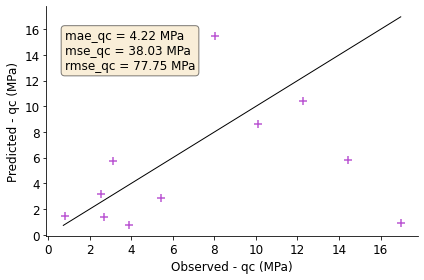

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_qc = %.2f MPa' % (mae_qc_NT_C7, ),r'mse_qc = %.2f MPa' % (mse_qc_NT_C7, ), r'rmse_qc = %.2f MPa' % (rmse_qc_NT_C7, )))

p1 = max(max(y_pred_NT_C7[:, 0]), max(y_NT_C7[:, 0]))
p2 = min(min(y_pred_NT_C7[:, 0]), min(y_NT_C7[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C7[:, 0], y_pred_NT_C7[:, 0], s = 50, c = 'mediumorchid', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(0.8, 16,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_qc', dpi = 600)

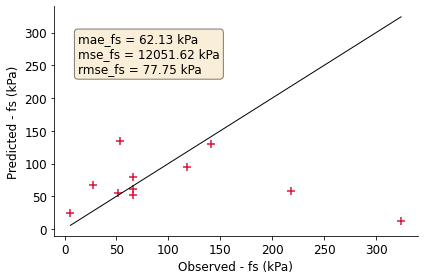

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_fs = %.2f kPa' % (mae_fs_NT_C7, ),r'mse_fs = %.2f kPa' % (mse_fs_NT_C7, ), r'rmse_fs = %.2f kPa' % (rmse_fs_NT_C7, )))

p1 = max(max(y_pred_NT_C7[:, 1]), max(y_NT_C7[:, 1]))
p2 = min(min(y_pred_NT_C7[:, 1]), min(y_NT_C7[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C7[:, 1], y_pred_NT_C7[:, 1], s = 50, c = 'crimson', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(13, 300, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_fs_fs', dpi = 600)

________________________________________________________________________________
Predictions for NT_C15
________________________________________________________________________________

In [ ]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_NT_C15.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Unnamed: 0'], axis = 1)

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
'''
Inputs
'''
X_NT_C15 = df_cpt[:, [0, 1, 2, 3, 4]]

#1 --> 'Depth (m)' --> index: 0
#2 --> "σ',v (kPa)" --> index: 1
#3 --> 'SBT (-)' --> index: 2
#4 --> 'SBTn (-)' --> index: 3
#5 --> 'Mod. SBTn (-)' --> index: 4

'''
Outputs
'''
y_NT_C15 = df_cpt[:, [5, 6]] 

#1 --> 'qc (MPa)' --> index: 5
#2 --> 'fs (kPa)' --> index: 6

In [ ]:
#Making a prediction
y_pred_NT_C15 = model.predict(X_NT_C15)  

In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_NT_C15, y_pred_NT_C15)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_NT_C15, y_pred_NT_C15)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_pred_NT_C15, y_NT_C15)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc_NT_C15 = mean_absolute_error(y_NT_C15[:, 0], y_pred_NT_C15[:, 0])
print('The mae is: %.4f MPa' %mae_qc_NT_C15)
mse_qc_NT_C15 = mean_squared_error(y_NT_C15[:, 0], y_pred_NT_C15[:, 0])
print('The mse is: %.4f MPa' %mse_qc_NT_C15)
rmse_qc_NT_C15 = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc_NT_C15)
r2_qc_NT_C15 = r2_score(y_NT_C15[:, 0], y_pred_NT_C15[:, 0])
print('The R2 is: %.4f MPa' %r2_qc_NT_C15)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs_NT_C15 = mean_absolute_error(y_NT_C15[:, 1], y_pred_NT_C15[:, 1])
print('The mae is: %.4f kPa' %mae_fs_NT_C15)
mse_fs_NT_C15 = mean_squared_error(y_NT_C15[:, 1], y_pred_NT_C15[:, 1])
print('The mse is: %.4f kPa' %mse_fs_NT_C15)
rmse_fs_NT_C15 = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs_NT_C15)
r2_fs_NT_C15 = r2_score(y_NT_C15[:, 1], y_pred_NT_C15[:, 1])
print('The R2 is: %.4f MPa' %r2_fs_NT_C15)

Metrics Global
The mae is: 28.5370
The mse is: 2743.9489
The rmse is: 52.3827
The R2 is: -0.7339
____________________________________________
Metrics for qc
The mae is: 5.0250 MPa
The mse is: 43.7132 MPa
The rmse is: 52.3827 MPa
The R2 is: -1.4676 MPa
____________________________________________
Metrics for fs
The mae is: 52.0490 kPa
The mse is: 5444.1846 kPa
The rmse is: 52.3827 kPa
The R2 is: -0.4916 MPa


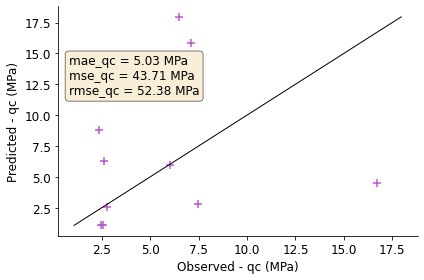

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_qc = %.2f MPa' % (mae_qc_NT_C15, ),r'mse_qc = %.2f MPa' % (mse_qc_NT_C15, ), r'rmse_qc = %.2f MPa' % (rmse_qc_NT_C15, )))

p1 = max(max(y_pred_NT_C15[:, 0]), max(y_NT_C15[:, 0]))
p2 = min(min(y_pred_NT_C15[:, 0]), min(y_NT_C15[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C15[:, 0], y_pred_NT_C15[:, 0], s = 50, c = 'mediumorchid', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(0.8, 14.9,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_qc', dpi = 600)

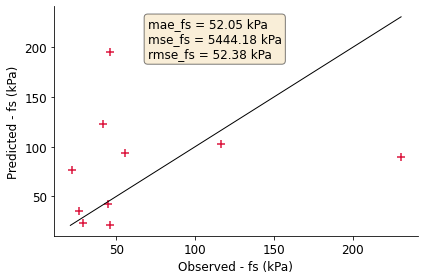

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_fs = %.2f kPa' % (mae_fs_NT_C15, ),r'mse_fs = %.2f kPa' % (mse_fs_NT_C15, ), r'rmse_fs = %.2f kPa' % (rmse_fs_NT_C15, )))

p1 = max(max(y_pred_NT_C15[:, 1]), max(y_NT_C15[:, 1]))
p2 = min(min(y_pred_NT_C15[:, 1]), min(y_NT_C15[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C15[:, 1], y_pred_NT_C15[:, 1], s = 50, c = 'crimson', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(70, 230, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_fs_fs', dpi = 600)